In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import C14preproc as prep
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from netCDF4 import Dataset

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:35: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


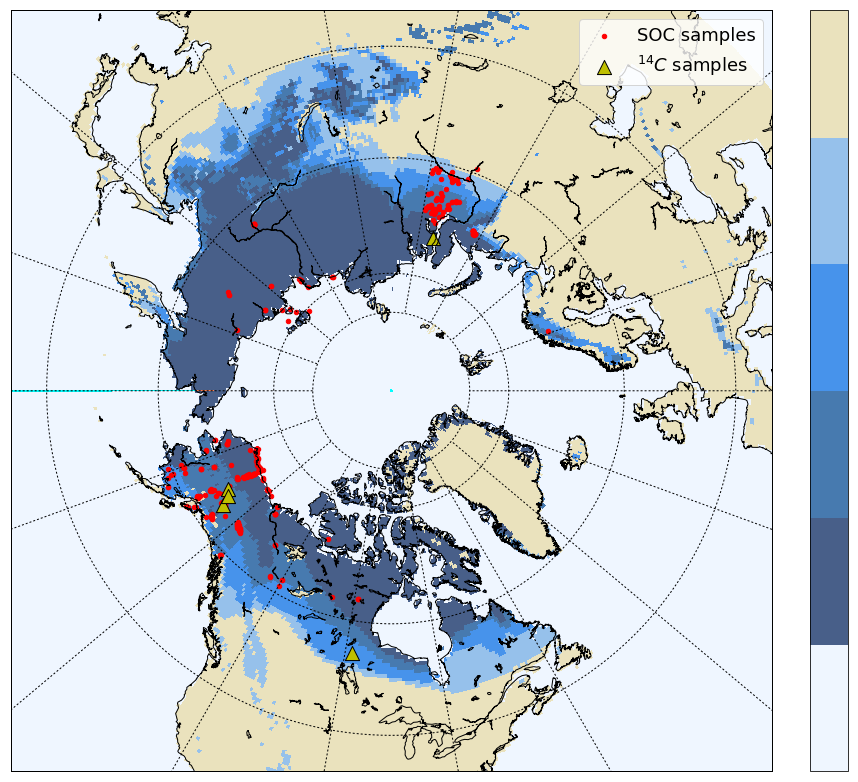

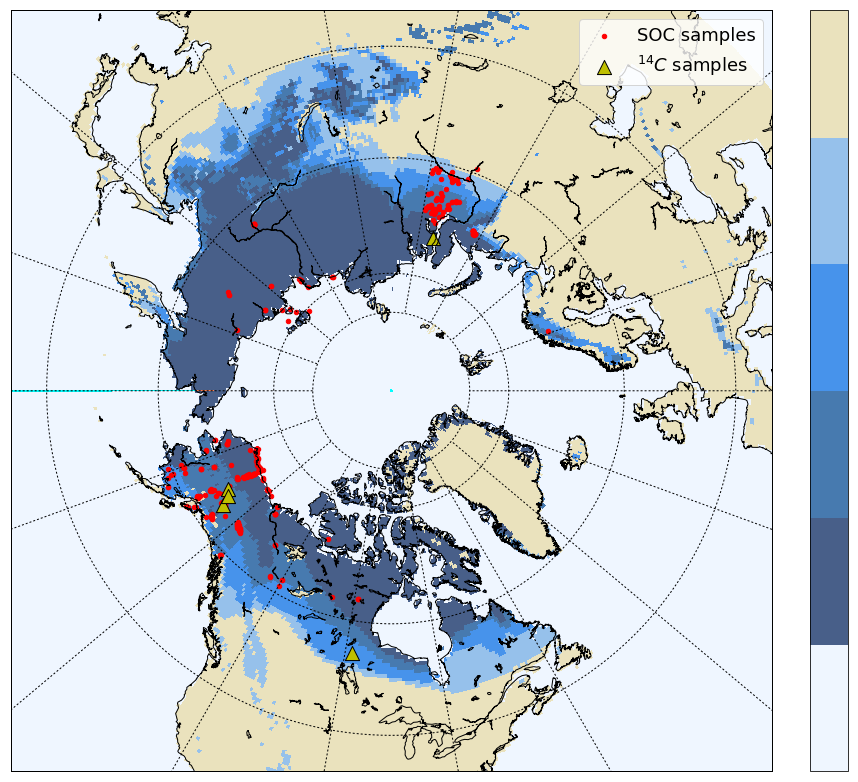

In [3]:
# ==============================
#%% plot all profiles
# ==============================
filename_soc = 'site_info_mishra.csv'
filename_he = 'site_info_he.csv'

data_soc = pd.read_csv(filename_soc,encoding='iso-8859-1',index_col='ProfileID')
data_d14c = pd.read_csv(filename_he,encoding='iso-8859-1',index_col='ProfileID')

profid_soc = data_soc.index.unique()
profid_d14c = data_d14c.index.unique()

lons_soc = prep.getvarxls(data_soc,'Lon',profid_soc,0)
lats_soc = prep.getvarxls(data_soc,'Lat',profid_soc,0)

lons_he = prep.getvarxls(data_d14c,'Lon',profid_d14c,0)
lats_he = prep.getvarxls(data_d14c,'Lat',profid_d14c,0)

# Open the permafrost mask and read in the data
fname_nc = 'permafrost_mask.nc'
nc = Dataset(fname_nc, 'r', format ='NETCDF4_CLASSIC')
pf_mask = np.squeeze(nc.variables['PFCODE'][:]) # shape is lat, lon as shown above
latnc = nc.variables['Lat'][:]
lonnc = nc.variables['Lon'][:]
nc.close()

p = pf_mask.astype("int")

# Assign different color to the corresponding code
# Continuous: 1, 5, 9, 13, 17
# Discontinuous: 2, 6, 10, 14, 18
# Sporadic: 3, 7, 11, 15, 19
# Isolated: 4, 8, 12, 16, 20
# Missing value for the rest above 20
p[p==5] = 1
p[p==9] = 1
p[p==13] = 1
p[p==17] = 1
p[p==6] = 2
p[p==10] = 2
p[p==14] = 2
p[p==18] = 2
p[p==7] = 3
p[p==11] = 3
p[p==15] = 3
p[p==19] = 3
p[p==8] = 4
p[p==12] = 4
p[p==16] = 4
p[p==20] = 4
p[p==24] = 0
p[p>20] = 5

fig = plt.figure(figsize=(26,14))
#ax = fig.add_axes([0.05,0.05,0.9,0.9])
# Polar Lambert Azimuthal Projection
m = Basemap(projection='nplaea',boundinglat=40.,lon_0=270.,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua',zorder=0)
# draw parallels and meridians.
m.drawparallels(np.arange(45.,90.,15.))
m.drawmeridians(np.arange(-180.,180.,20.))
m.drawmapboundary(fill_color='aqua')
#ax = plt.gca()

# Overlay the permafrost status map
lon_p,lat_p = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x, y = m(lon_p,lat_p)

# mdata = maskoceans(lon_p, lat_p, p[:,:])

# Create new cmap for permafrost
cmap_name = 'Permafrost'
colors = [(0.937, 0.965, 1), (0.282, 0.373, 0.537), (0.278, 0.478, 0.686), (0.278, 0.576, 0.922), (0.588, 0.757, 0.922),
          (0.918, 0.886, 0.741)]
n_bin = 6
newcm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)

#djet.set_bad('white',1.)

# cs1 = map.contourf(x,y,mdata,clevs,cmap=plt.cm.jet)
# cs1 = map.contourf(x,y,ncvar_maize[:,:], [100], colors="black")
cs = m.pcolormesh(x,y,p[:,:], cmap=newcm, edgecolors = 'None') # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = m.colorbar(cs,location='right',pad="5%",ticks=None,extend='neither')
#plt.title('Maize harvested area fraction')
cbar.set_ticks([])
#cbar.ax.set_xticklabels(['', '', '', '', '', ''])
#cbar.ax.tick_params(labelsize=18) 

# m.fillcontinents(color='grey',lake_color='#99ffff',zorder=0)
# First add Mishra's data
x, y = m(lons_soc, lats_soc)
m.scatter(x,y,20,marker='o',color='r',label='SOC samples')#,alpha=0.7)#,latlon=True)
# Then add He's data
x, y = m(lons_he, lats_he)
m.scatter(x,y,200,marker='^',color='y',linewidths=1, edgecolor='k', label='$^{14}C$ samples')#,alpha=0.7)#,latlon=True)
plt.legend(scatterpoints=1,loc=1, prop={'size': 18})

#ax.set_title('Profile Sites')
plt.title(' ')
plt.show()

#fig.savefig('./Shu2018_Fig2.png')



In [ ]:
pp = plt.cm.get_cmap(plt.cm.jet)

In [ ]:
pp(100)

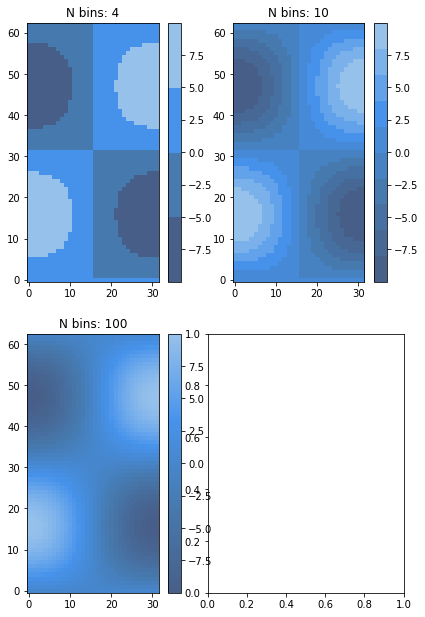

In [4]:
from matplotlib.colors import LinearSegmentedColormap

# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10
colors = [(0.282, 0.373, 0.537), (0.278, 0.478, 0.686), (0.278, 0.576, 0.922), (0.588, 0.757, 0.922)]
n_bins = [4, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'permafrost'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)
plt.show()

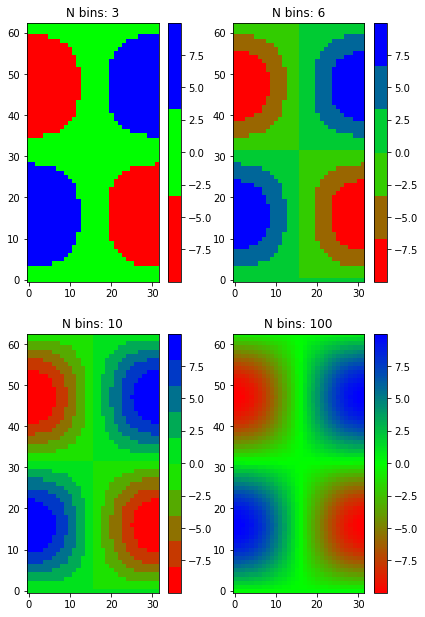

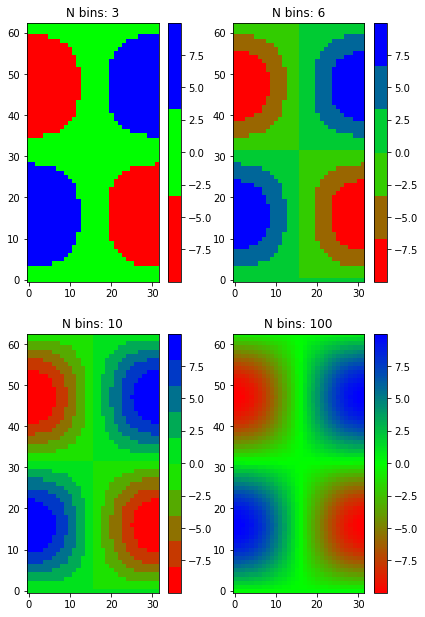

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)
    
plt.show()